In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap

import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()
url = "https://raw.githubusercontent.com/blastchar/telco-customer-churn/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.drop_duplicates(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
if 'customerID' in df.columns:
    df.drop(['customerID'], axis=1, inplace=True)



In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')

df = pd.get_dummies(df, columns=categorical_cols)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72'])
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)

# New Section

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# 7. Model Training

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print()

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1081
           1       0.63      0.54      0.58       321

    accuracy                           0.82      1402
   macro avg       0.75      0.72      0.73      1402
weighted avg       0.81      0.82      0.82      1402

ROC-AUC: 0.8475249350866424

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1081
           1       0.57      0.51      0.54       321

    accuracy                           0.80      1402
   macro avg       0.71      0.70      0.70      1402
weighted avg       0.79      0.80      0.79      1402

ROC-AUC: 0.8225307708046952

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1081
           1       0.56      0.54      0.55       321

    accuracy                           0.80      1402
   m

In [ ]:
# 8. Model Evaluation
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print()

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1081
           1       0.63      0.54      0.58       321

    accuracy                           0.82      1402
   macro avg       0.75      0.72      0.73      1402
weighted avg       0.81      0.82      0.82      1402

ROC-AUC: 0.8475249350866424

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1081
           1       0.57      0.51      0.54       321

    accuracy                           0.80      1402
   macro avg       0.71      0.70      0.70      1402
weighted avg       0.79      0.80      0.79      1402

ROC-AUC: 0.8225307708046952

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1081
           1       0.56      0.54      0.55       321

    accuracy                           0.80      1402
   m

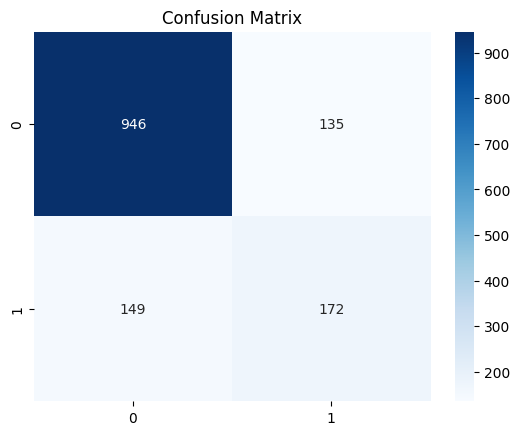

In [ ]:
# 9. Confusion Matrix for Best Model
best_model = xgb
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

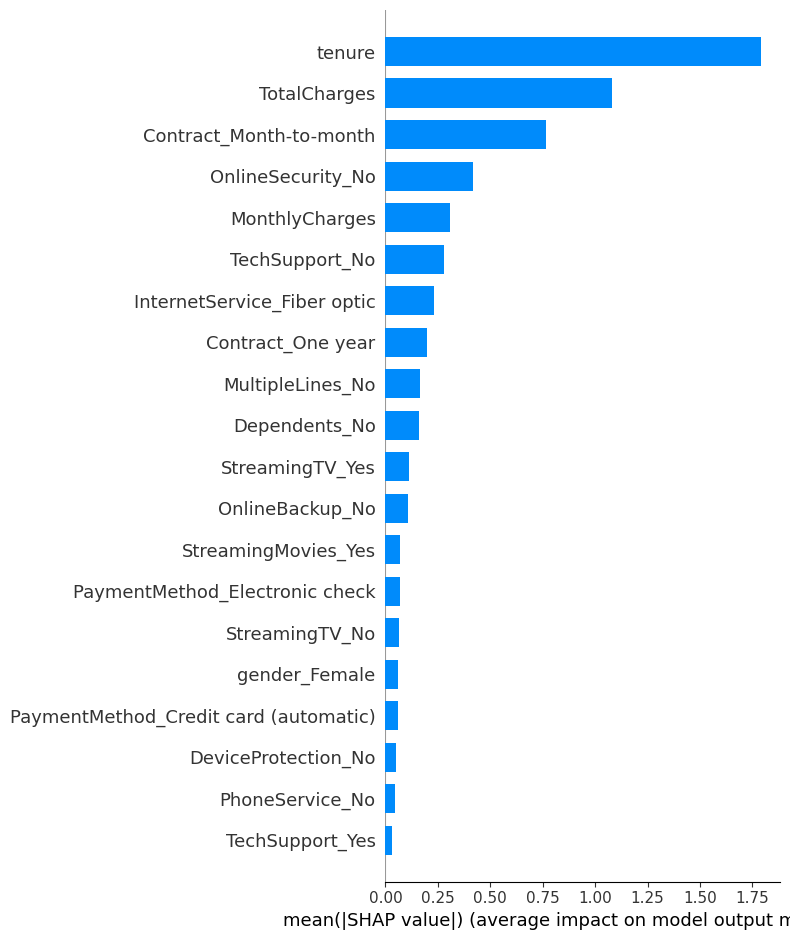

In [ ]:
# 10. SHAP Values for Model Interpretation
# SHAP works best with unscaled data for interpretation
# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar")


In [ ]:
# 11. (Optional) Deploy with Streamlit
# Save this script as app.py and run with: streamlit run app.py

"""
import streamlit as st
st.title("Customer Churn Predictor")
# Add widgets and model loading code here...
"""

'\nimport streamlit as st\nst.title("Customer Churn Predictor")\n# Add widgets and model loading code here...\n'

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv") # Replace with your actual file name

# Drop irrelevant columns
df = df.drop("customerID", axis=1)

# Convert total charges to numeric (fix common issue)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing values
df = df.dropna()

# Encode categorical variables
for column in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
with open("WA_Fn-UseC_-Telco-Customer-Churn", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as model.pkl")

✅ Model trained and saved as model.pkl


In [ ]:
# Load your model
def load_model():
    with open("WA_Fn-UseC_-Telco-Customer-Churn", "rb") as f:
        return pickle.load(f)

model = load_model()
print("Loaded Successfully")

Loaded Successfully


In [ ]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
import numpy as np
import pickle

# Load the model
loaded_model = pickle.load(open('WA_Fn-UseC_-Telco-Customer-Churn', 'rb'))

# Full input data — must match the model’s expected 19 features (this is an example!)
input_values = [[1, 0, 1, 0, 10, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 50.0, 500.0]]

# Convert to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predict
prediction = loaded_model.predict(input_data_reshaped)

print(prediction)
if prediction[0] == 1:
    print("The customer is likely to churn")
else:
    print("The customer is not likely to churn")

[0]
The customer is not likely to churn


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
